In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### About the company
In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown
to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations
across Chicago. The bikes can be unlocked from one station and returned to any other station
in the system anytime.
Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to
broad consumer segments. One approach that helped make these things possible was the
flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships.
Customers who purchase single-ride or full-day passes are referred to as casual riders.
Customers who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable
than casual riders. Although the pricing flexibility helps Cyclistic attract more customers,
Marketing Manager Moreno believes that maximizing the number of annual members will be key to future growth.
Rather than creating a marketing campaign that targets all-new customers, Moreno believes
there is a solid opportunity to convert casual riders into members. She notes that casual riders
are already aware of the Cyclistic program and have chosen Cyclistic for their mobility needs.
Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into
annual members. In order to do that, however, the team needs to better understand how
annual members and casual riders differ, why casual riders would buy a membership, and how
digital media could affect their marketing tactics. Moreno and her team are interested in
analyzing the Cyclistic historical bike trip data to identify trends.

## Business Problem
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

## Importing and Exploring the dataset for Q1 of 2019

In [2]:
df1= pd.read_csv('Divvy_Trips_2019_Q1.csv')
df1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989.0
1,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990.0
2,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994.0
3,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993.0
4,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994.0


In [3]:
df1.shape

(365069, 12)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365069 entries, 0 to 365068
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            365069 non-null  int64  
 1   start_time         365069 non-null  object 
 2   end_time           365069 non-null  object 
 3   bikeid             365069 non-null  int64  
 4   tripduration       365069 non-null  object 
 5   from_station_id    365069 non-null  int64  
 6   from_station_name  365069 non-null  object 
 7   to_station_id      365069 non-null  int64  
 8   to_station_name    365069 non-null  object 
 9   usertype           365069 non-null  object 
 10  gender             345358 non-null  object 
 11  birthyear          347046 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 33.4+ MB


In [5]:
df1.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               19711
birthyear            18023
dtype: int64

## Data Cleaning for Q1 of 2019

In [6]:
#  Changing the datatypes of columns
df1['start_time'] = df1['start_time'].astype('datetime64[ns]')
df1['end_time'] = df1['end_time'].astype('datetime64[ns]')

In [7]:
# Fillinng the null values as they can't drop so many of them 
df1['gender'] = df1['gender'].replace(np.nan,'Unspecified')

In [8]:
# taking riders upto the age of 65 as more aged people are less likely to ride gemerally
df1 = df1[df1['birthyear']>1940]

## Visualizations to explore data for Q1 of 2019

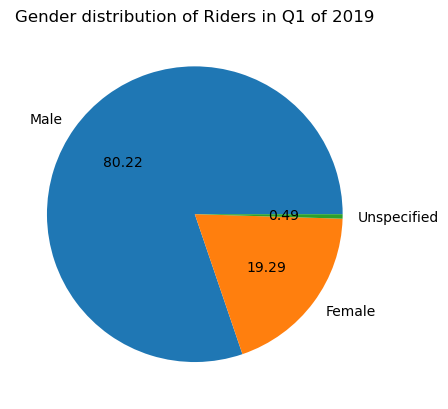

In [9]:
gender = df1['gender'].value_counts(normalize=True).index
gender_count = df1['gender'].value_counts(normalize=True).values
plt.pie(gender_count,labels = gender,autopct='%.2f')
plt.title('Gender distribution of Riders in Q1 of 2019')
plt.show()

In [10]:
# taking riders upto the age of 65 as more aged people are less likely to ride gemerally
df1 = df1[df1['birthyear']>1940]
df1.shape
# only taking riders which are born after 1940 

(346818, 12)

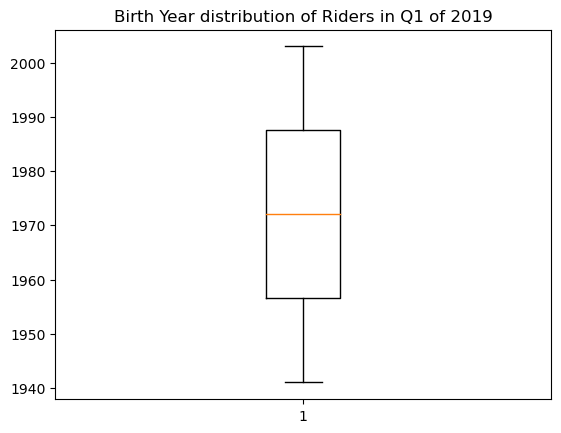

In [11]:
plt.boxplot(x=df1['birthyear'].value_counts().index)
plt.title('Birth Year distribution of Riders in Q1 of 2019')

plt.show()

so from this boxplot we get to know that the riders are born in between 1940 to 2003.

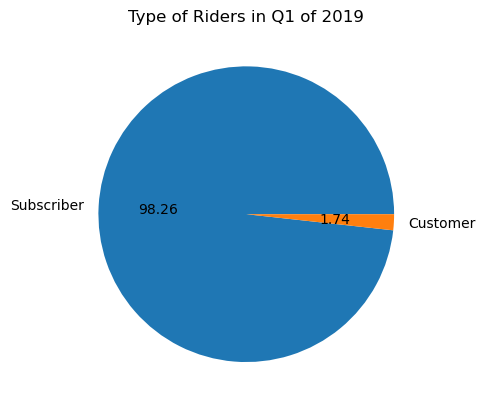

In [12]:
user  = df1['usertype'].value_counts().index
user_count = df1['usertype'].value_counts().values
plt.pie(user_count,labels = user,autopct='%.2f')
plt.title('Type of Riders in Q1 of 2019')
plt.show()

##  Importing and Exploring the dataset for Q2 of 2019

In [13]:
df2= pd.read_csv('Divvy_Trips_2019_Q2.csv')
df2.head()

,01 - Rental Details Rental ID,01 - Rental Details Local Start Time,01 - Rental Details Local End Time,01 - Rental Details Bike ID,01 - Rental Details Duration In Seconds Uncapped,03 - Rental Start Station ID,03 - Rental Start Station Name,02 - Rental End Station ID,02 - Rental End Station Name,User Type,Member Gender,05 - Member Details Member Birthday Year
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108163 entries, 0 to 1108162
Data columns (total 12 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   01 - Rental Details Rental ID                     1108163 non-null  int64  
 1   01 - Rental Details Local Start Time              1108163 non-null  object 
 2   01 - Rental Details Local End Time                1108163 non-null  object 
 3   01 - Rental Details Bike ID                       1108163 non-null  int64  
 4   01 - Rental Details Duration In Seconds Uncapped  1108163 non-null  object 
 5   03 - Rental Start Station ID                      1108163 non-null  int64  
 6   03 - Rental Start Station Name                    1108163 non-null  object 
 7   02 - Rental End Station ID                        1108163 non-null  int64  
 8   02 - Rental End Station Name                      1108163 non-null  obje

In [15]:
df2.shape

(1108163, 12)

In [16]:
df2.isnull().sum()

01 - Rental Details Rental ID                            0
01 - Rental Details Local Start Time                     0
01 - Rental Details Local End Time                       0
01 - Rental Details Bike ID                              0
01 - Rental Details Duration In Seconds Uncapped         0
03 - Rental Start Station ID                             0
03 - Rental Start Station Name                           0
02 - Rental End Station ID                               0
02 - Rental End Station Name                             0
User Type                                                0
Member Gender                                       185554
05 - Member Details Member Birthday Year            180953
dtype: int64

## Data Cleaning for Q2 of 2019

In [17]:
df2.rename(columns = {"01 - Rental Details Rental ID":"trip_id","01 - Rental Details Local Start Time":"start_time",
            "01 - Rental Details Local End Time":"end_time","01 - Rental Details Bike ID":"bikeid",
            "01 - Rental Details Duration In Seconds Uncapped":"tripduration","03 - Rental Start Station ID":"from_station_id",
           "03 - Rental Start Station Name":"from_station_name","02 - Rental End Station ID":"to_station_id",
           "02 - Rental End Station Name":"to_station_name","User Type":"usertype","Member Gender":"gender",
            "05 - Member Details Member Birthday Year":"birthyear"},inplace = True)

In [18]:
df2.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975.0
1,22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984.0
2,22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990.0
3,22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993.0
4,22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992.0


In [19]:
#  Changing the datatypes of columns
df2['start_time'] = df2['start_time'].astype('datetime64[ns]')
df2['end_time'] = df2['end_time'].astype('datetime64[ns]')
df2['birthyear'] = df2['birthyear'].astype('float64')

In [20]:
# Fillinng the null values as they can't drop so many of them 
df2['gender'] = df2['gender'].replace(np.nan,'Unspecified')

In [21]:
df2.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender                    0
birthyear            180953
dtype: int64

In [22]:
# taking riders upto the age of 65 as more aged people are less likely to ride gemerally
(df2['birthyear']<1940).value_counts()

False    1107907
True         256
Name: birthyear, dtype: int64

In [23]:
df2 = df2[df2['birthyear']>1940]
df2 = df2[df2['birthyear']<2005]

In [24]:
df2.shape

(926893, 12)

## Visualizations for Q2 of 2019

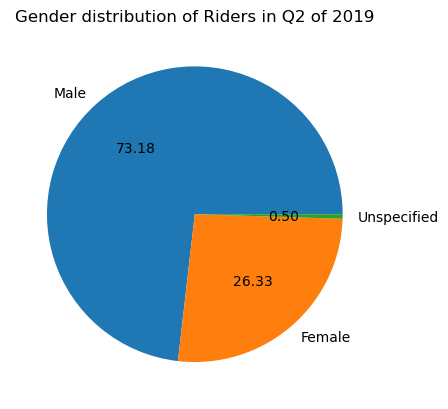

In [25]:
gender = df2['gender'].value_counts(normalize=True).index
gender_count = df2['gender'].value_counts(normalize=True).values
plt.pie(gender_count,labels = gender,autopct='%.2f')
plt.title('Gender distribution of Riders in Q2 of 2019')
plt.show()

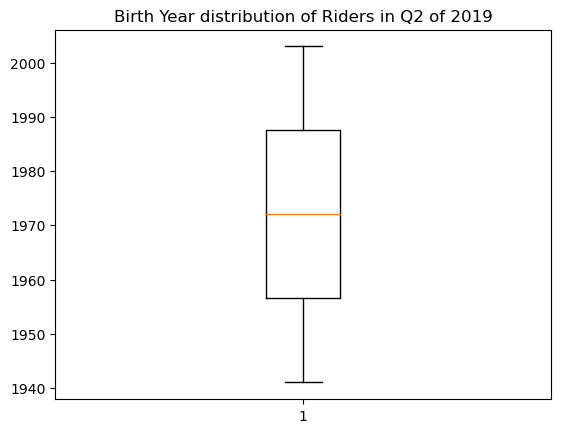

In [26]:
plt.boxplot(x=df2['birthyear'].value_counts().index)
plt.title('Birth Year distribution of Riders in Q2 of 2019')
plt.show()

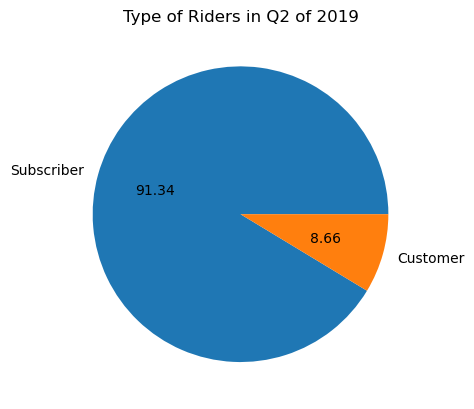

In [27]:
user  = df2['usertype'].value_counts().index
user_count = df2['usertype'].value_counts().values
plt.pie(user_count,labels = user,autopct='%.2f')
plt.title('Type of Riders in Q2 of 2019')
plt.show()

###  Importing and Exploring the dataset for Q3 of 2019

In [28]:
df3= pd.read_csv('Divvy_Trips_2019_Q3.csv')
df3.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992.0
1,23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,NaN,NaN
2,23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
3,23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,NaN,NaN
4,23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,NaN,NaN


In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640718 entries, 0 to 1640717
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_id            1640718 non-null  int64  
 1   start_time         1640718 non-null  object 
 2   end_time           1640718 non-null  object 
 3   bikeid             1640718 non-null  int64  
 4   tripduration       1640718 non-null  object 
 5   from_station_id    1640718 non-null  int64  
 6   from_station_name  1640718 non-null  object 
 7   to_station_id      1640718 non-null  int64  
 8   to_station_name    1640718 non-null  object 
 9   usertype           1640718 non-null  object 
 10  gender             1353368 non-null  object 
 11  birthyear          1362624 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 150.2+ MB


## Data Cleaning for Q3 of 2019

In [30]:
df3.isnull().sum()

trip_id                   0
start_time                0
end_time                  0
bikeid                    0
tripduration              0
from_station_id           0
from_station_name         0
to_station_id             0
to_station_name           0
usertype                  0
gender               287350
birthyear            278094
dtype: int64

In [31]:
#  Changing the datatypes of columns
df3['start_time'] = df3['start_time'].astype('datetime64[ns]')
df3['end_time'] = df3['end_time'].astype('datetime64[ns]')

In [32]:
# Fillinng the null values as they can't drop so many of them 
df3['gender'] = df3['gender'].replace(np.nan,'Unspecified')

In [33]:
(df3['birthyear']<1940).value_counts()

False    1640247
True         471
Name: birthyear, dtype: int64

In [34]:
df3 = df3[df3['birthyear']>1940]
df3 = df3[df3['birthyear']<2005]

In [35]:
df3.shape

(1362060, 12)

## Visualization for Q3 of 2019

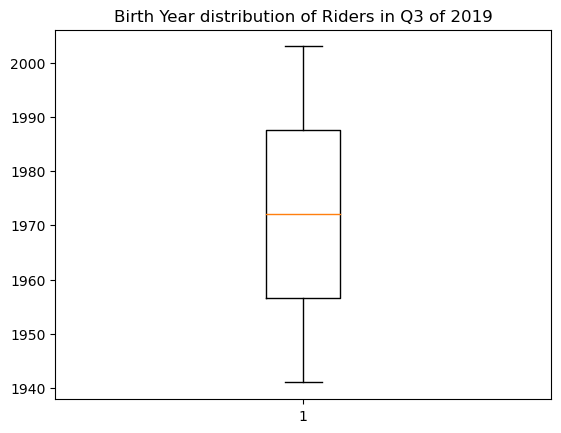

In [36]:
plt.boxplot(x=df3['birthyear'].value_counts().index)
plt.title('Birth Year distribution of Riders in Q3 of 2019')
plt.show()

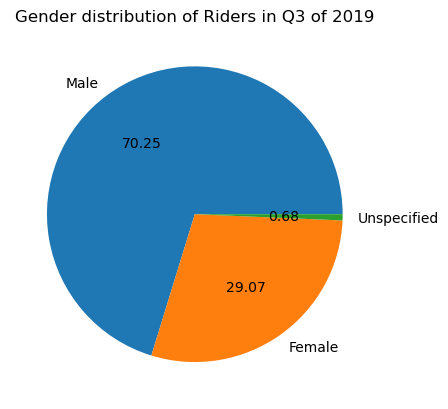

In [37]:
gender = df3['gender'].value_counts(normalize=True).index
gender_count = df3['gender'].value_counts(normalize=True).values
plt.pie(gender_count,labels = gender,autopct='%.2f')
plt.title('Gender distribution of Riders in Q3 of 2019')
plt.show()

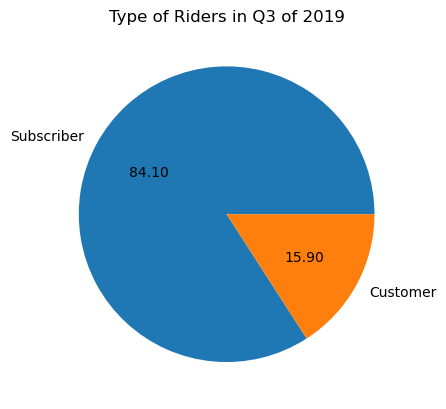

In [38]:
user  = df3['usertype'].value_counts().index
user_count = df3['usertype'].value_counts().values
plt.pie(user_count,labels = user,autopct='%.2f')
plt.title('Type of Riders in Q3 of 2019')
plt.show()

##  Importing and Exploring the dataset for Q4 of 2019

In [39]:
df4= pd.read_csv('Divvy_Trips_2019_Q4.csv')
df4.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987.0
1,25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998.0
2,25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991.0
3,25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990.0
4,25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987.0


In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704054 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            704054 non-null  int64  
 1   start_time         704054 non-null  object 
 2   end_time           704054 non-null  object 
 3   bikeid             704054 non-null  int64  
 4   tripduration       704054 non-null  object 
 5   from_station_id    704054 non-null  int64  
 6   from_station_name  704054 non-null  object 
 7   to_station_id      704054 non-null  int64  
 8   to_station_name    704054 non-null  object 
 9   usertype           704054 non-null  object 
 10  gender             637463 non-null  object 
 11  birthyear          642373 non-null  float64
dtypes: float64(1), int64(4), object(7)
memory usage: 64.5+ MB


In [41]:
df4.shape

(704054, 12)

In [42]:
df4.isnull().sum()

trip_id                  0
start_time               0
end_time                 0
bikeid                   0
tripduration             0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
usertype                 0
gender               66591
birthyear            61681
dtype: int64

## Data Cleaning for Q4 of 2019

In [43]:
df4['start_time'] = df4['start_time'].astype("datetime64[ns]")
df4['end_time'] = df4['end_time'].astype("datetime64[ns]")

In [44]:
df4['gender'] = df4['gender'].replace(np.nan,"Unspecified")

In [45]:
(df4['birthyear']<1940).value_counts()

False    703743
True        311
Name: birthyear, dtype: int64

In [46]:
df4 = df4[df4['birthyear']>1940]
df4 = df4[df4['birthyear']<2005]

In [47]:
df4['birthyear'].unique()

array([1987., 1998., 1991., 1990., 1994., 1995., 1993., 1977., 1980.,
       1992., 1962., 1967., 1964., 1976., 1985., 1989., 2000., 1988.,
       1996., 1997., 1986., 1984., 1979., 1973., 1999., 1975., 1981.,
       1982., 1983., 1971., 1970., 1963., 1968., 1961., 1965., 1958.,
       1969., 1960., 1966., 1952., 1954., 1953., 1955., 1972., 1948.,
       1959., 1978., 1956., 1974., 1951., 1957., 1944., 2001., 2002.,
       1949., 1947., 1945., 1946., 1950., 2003., 1941., 1942., 1943.])

# Visualizations for Q4 of 2019

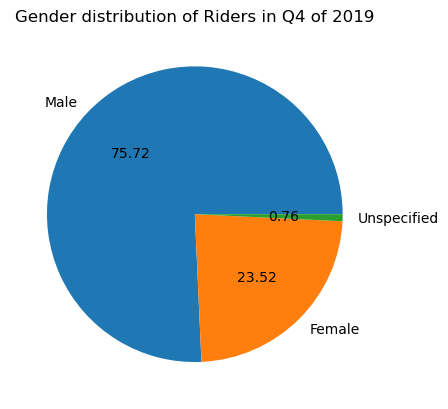

In [48]:
gender = df4['gender'].value_counts(normalize=True).index
gender_count = df4['gender'].value_counts(normalize=True).values
plt.pie(gender_count,labels=gender,autopct='%.2f')
plt.title('Gender distribution of Riders in Q4 of 2019')
plt.show()

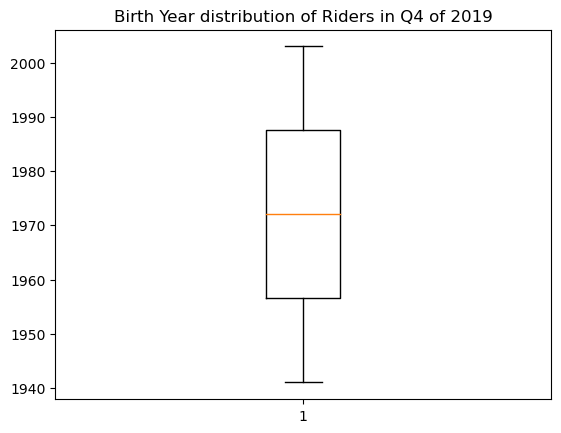

In [49]:
plt.boxplot(x=df4['birthyear'].value_counts().index)
plt.title('Birth Year distribution of Riders in Q4 of 2019')
plt.show()

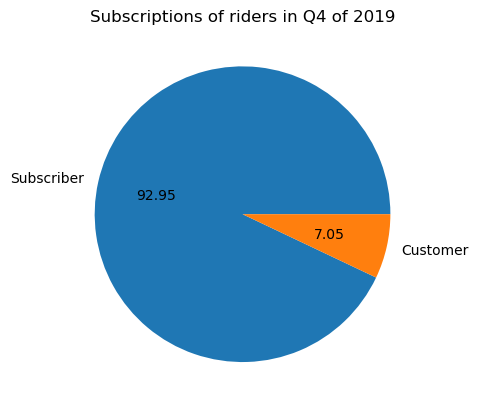

In [50]:
user = df4['usertype'].value_counts().index
user_count = df4['usertype'].value_counts().values
plt.pie(user_count,labels=user,autopct="%.2f")
plt.title("Subscriptions of riders in Q4 of 2019")
plt.show()

# Analysing the whole data for 2019

### Appending all the dataframe of quaters of 2019

In [51]:
# appending all the dataframes together for 2019
df = df1.append(df2)
df = df.append(df3)
df = df.append(df4)

In [52]:
df.shape

(3277768, 12)

In [53]:
df.isnull().sum()

trip_id              0
start_time           0
end_time             0
bikeid               0
tripduration         0
from_station_id      0
from_station_name    0
to_station_id        0
to_station_name      0
usertype             0
gender               0
birthyear            0
dtype: int64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3277768 entries, 0 to 704053
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   trip_id            int64         
 1   start_time         datetime64[ns]
 2   end_time           datetime64[ns]
 3   bikeid             int64         
 4   tripduration       object        
 5   from_station_id    int64         
 6   from_station_name  object        
 7   to_station_id      int64         
 8   to_station_name    object        
 9   usertype           object        
 10  gender             object        
 11  birthyear          float64       
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 325.1+ MB


## Visualizations for whole year of 2019

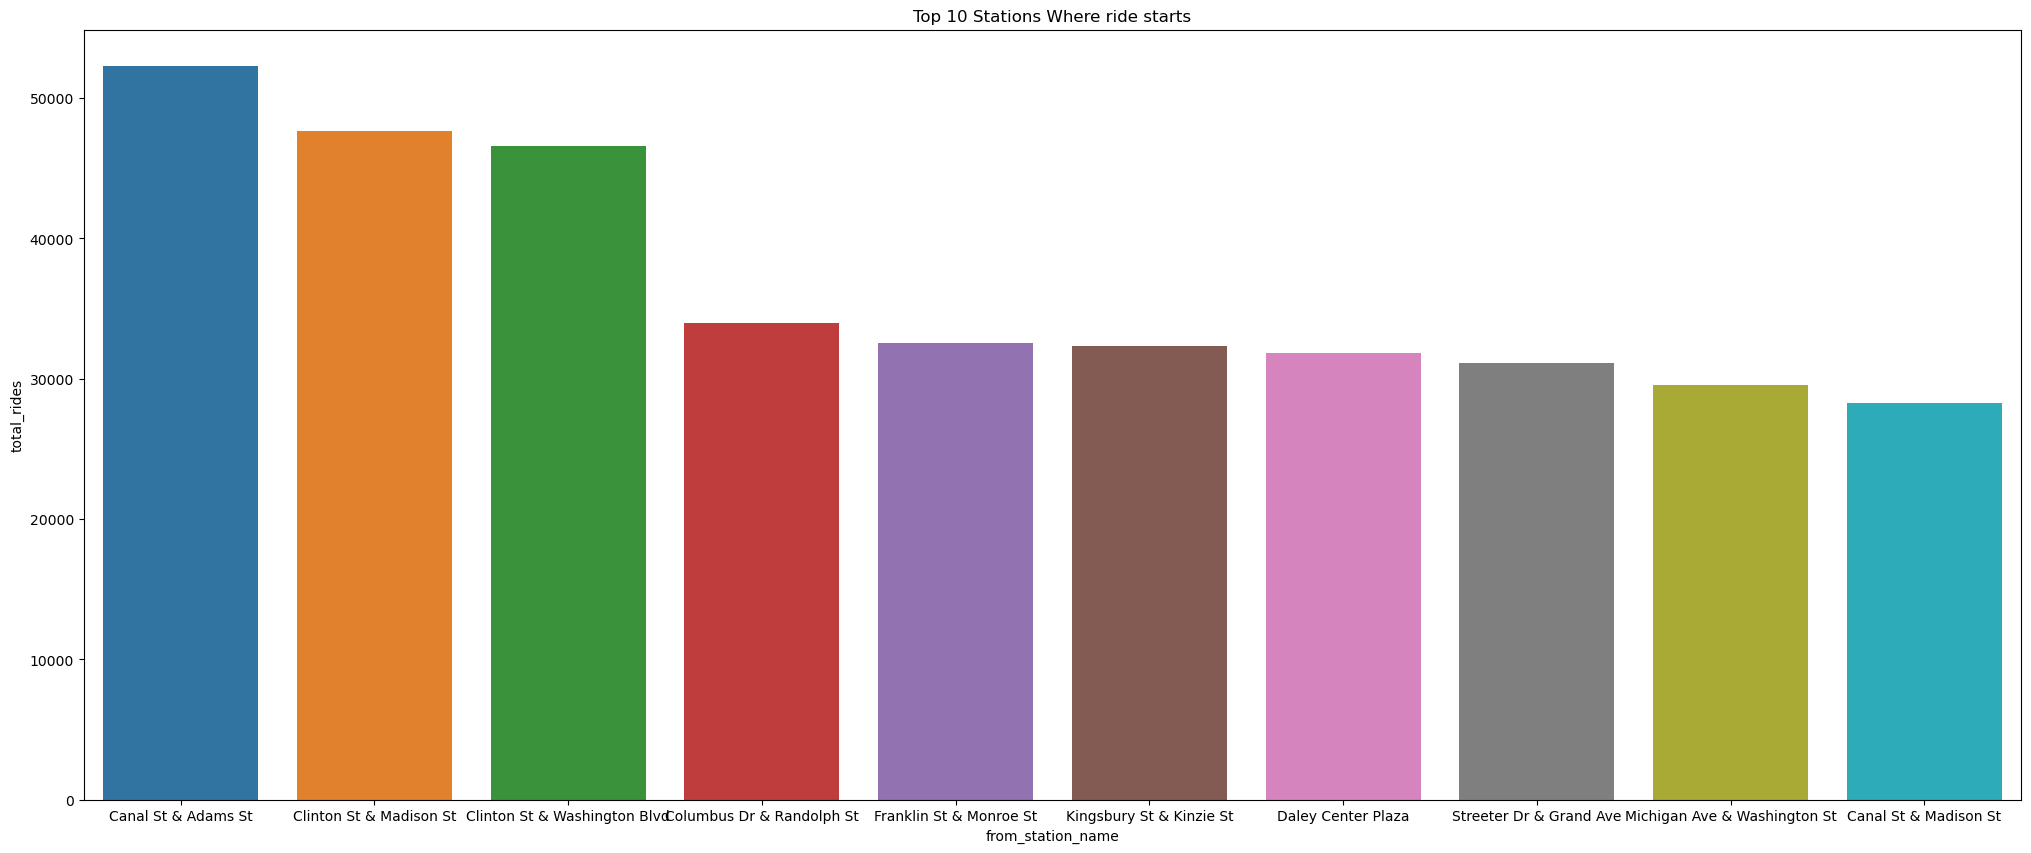

In [55]:
top_10_Starting_stations = df.groupby("from_station_name").size().reset_index().rename(columns = {0:'total_rides'}).sort_values('total_rides',ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x="from_station_name", y="total_rides",data=top_10_Starting_stations.head(10))
plt.title("Top 10 Stations Where ride starts")
plt.show()

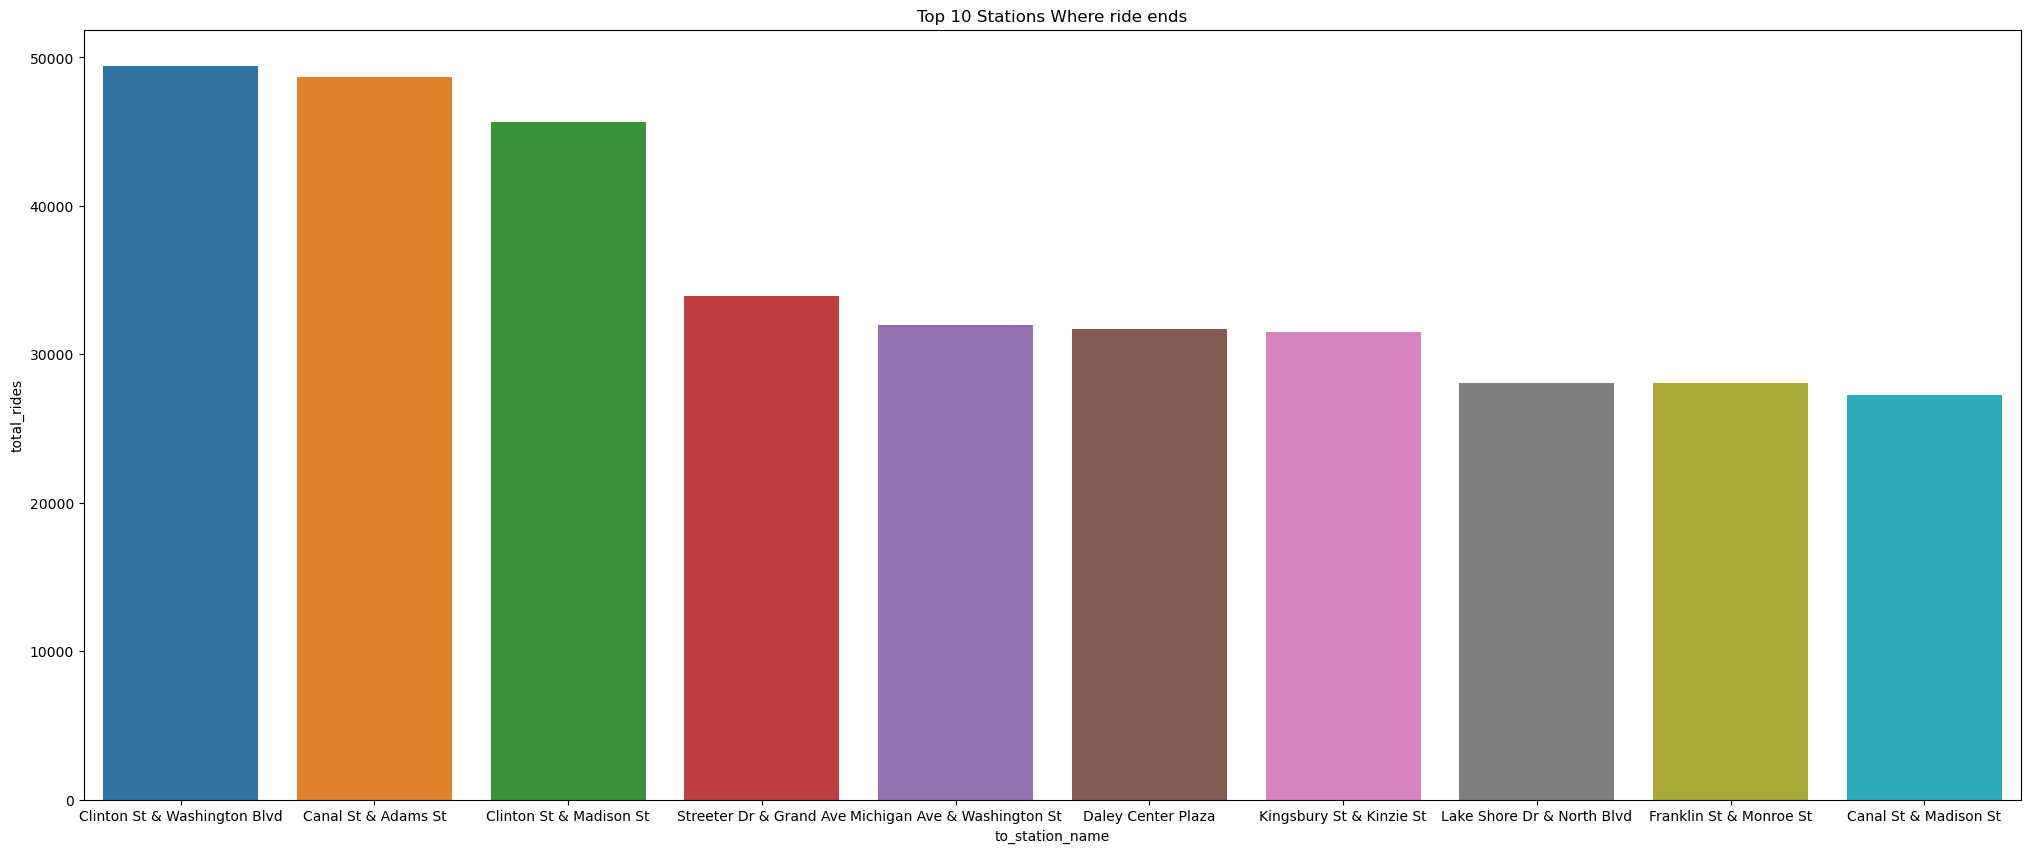

In [56]:
top_10_ending_stations = df.groupby("to_station_name").size().reset_index().rename(columns = {0:'total_rides'}).sort_values('total_rides',ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x="to_station_name", y="total_rides",data=top_10_ending_stations.head(10))
plt.title("Top 10 Stations Where ride ends")
plt.show()

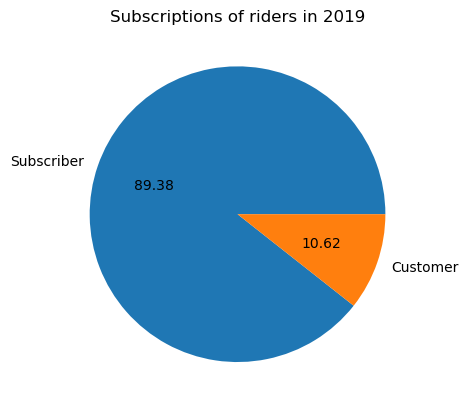

In [57]:
user = df['usertype'].value_counts().index
user_count = df['usertype'].value_counts().values
plt.pie(user_count,labels=user,autopct="%.2f")
plt.title("Subscriptions of riders in 2019")
plt.show()

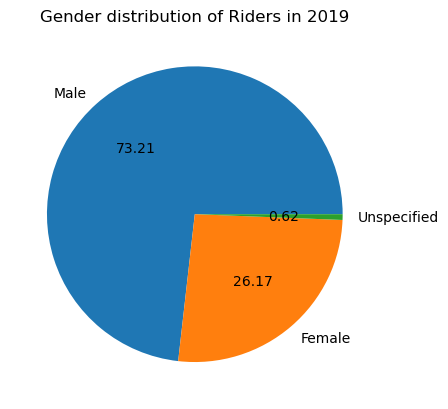

In [58]:
gender = df['gender'].value_counts(normalize=True).index
gender_count = df['gender'].value_counts(normalize=True).values
plt.pie(gender_count,labels=gender,autopct='%.2f')
plt.title('Gender distribution of Riders in 2019')
plt.show()

In [59]:
# coverting datetime columns into date only
df['start_time'] = pd.to_datetime(df['start_time']).dt.date
df['end_time'] = pd.to_datetime(df['end_time']).dt.date

In [60]:
daily_rides_count = df.groupby('start_time').size().reset_index().rename(columns= {0:"total_rides"})
daily_rides_count.set_index("start_time")
daily_rides_count.head()

,start_time,total_rides
0,2019-01-01,1194
1,2019-01-02,4063
2,2019-01-03,5418
3,2019-01-04,6320
4,2019-01-05,5032


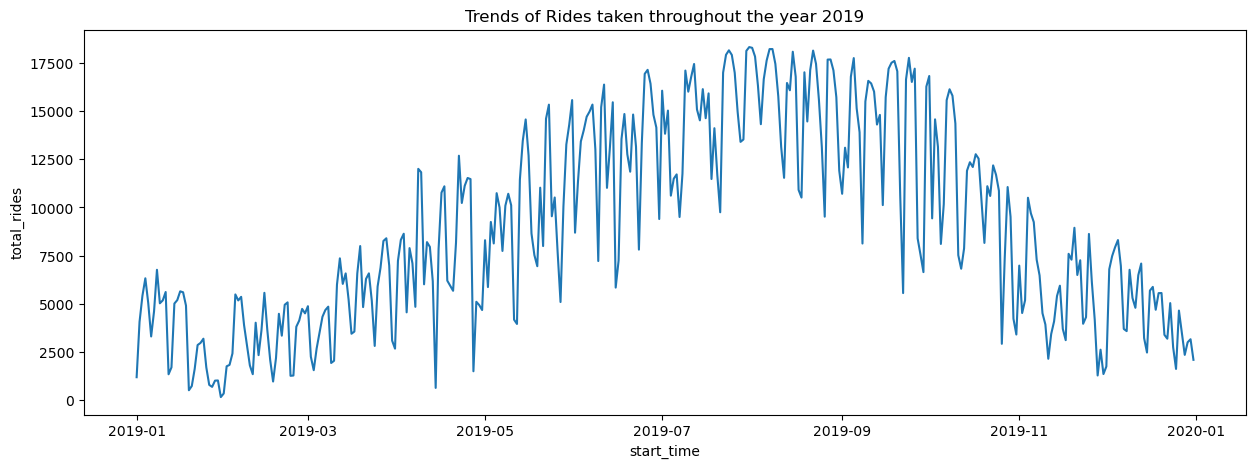

In [61]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x=daily_rides_count['start_time'],y=daily_rides_count['total_rides'])
plt.title("Trends of Rides taken throughout the year 2019")
plt.show()

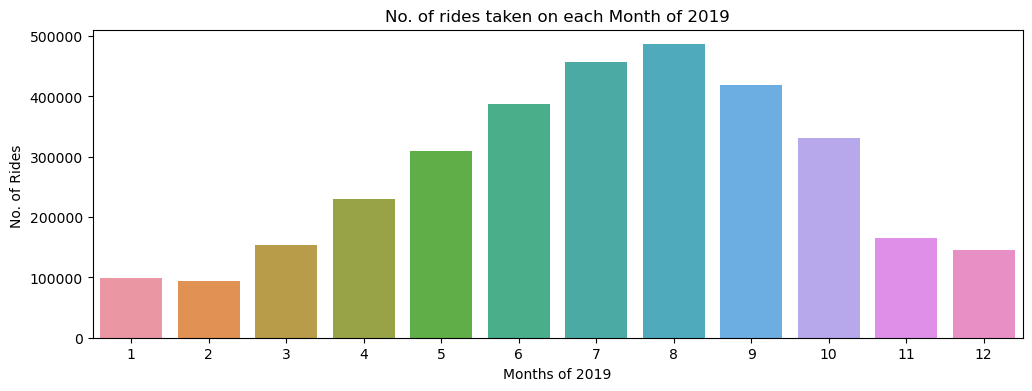

In [62]:
# Separating the day, month and day columns for monthly analysis
df['year'] = pd.DatetimeIndex(df['start_time']).year
df['month'] = pd.DatetimeIndex(df['start_time']).month
df['day'] = pd.DatetimeIndex(df['start_time']).day
monthly_rides = df.groupby('month').size().reset_index().rename(columns={0:"total_rides"})
plt.figure(figsize=(12,4))
sns.barplot(x=monthly_rides["month"], y=monthly_rides["total_rides"],data=monthly_rides)
plt.title("No. of rides taken on each Month of 2019")
plt.xlabel("Months of 2019")
plt.ylabel("No. of Rides ")
plt.show()

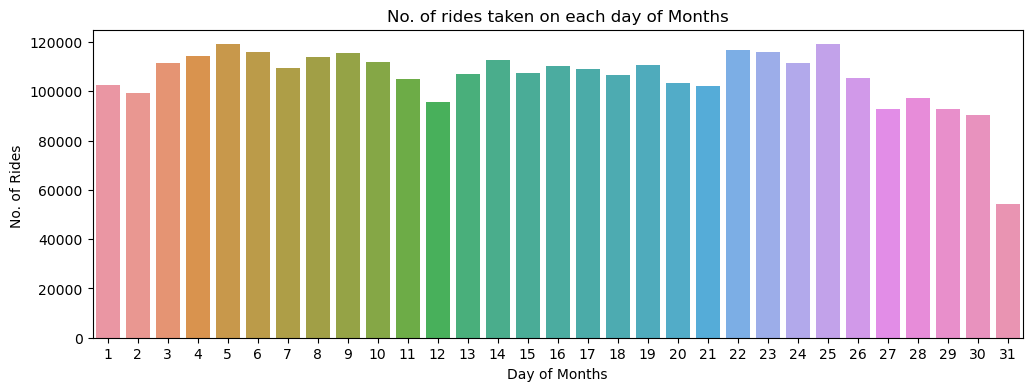

In [63]:
daily_rides = df.groupby('day').size().reset_index().rename(columns={0:"total_rides"})
plt.figure(figsize=(12,4))
sns.barplot(x=daily_rides["day"], y=daily_rides["total_rides"],data=daily_rides)
plt.title("No. of rides taken on each day of Months")
plt.xlabel("Day of Months")
plt.ylabel("No. of Rides ")
plt.show()

## Suggestion after Analysis

As we already have informed that the company generates most of the Revenue from the Annual Subscription of Customers so that we can conclude after this Analysis that--
1. As the female riders are using the services less in number than Male so marketing plans should be focussed on attracting more female riders.
2. The months from June to August sees highest no. of customers so the company should focus on providing offers on subscriptions in these months to attract customers to take Annual Subscription.
3. The Age of most of Riders are seen to be between 30 to 60, so the company should focus marketing plan to attract more of young customers as this section of population is more keen to fitness and leisure activities.
4. According to weather patterns of Chicago the winter season( december to febuary) see less no. of riders, so the company can focus on providing other riding equipments like warm jackets to subscribing riders to improve the experience of riding which ultimately lead to more number of subscriptions.